In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
def getSymbolReport(symbol:str) -> str:
    """
    Get required financial report for the desired symbol.
    symbol: Symbol
    """
    ticker = yf.Ticker(symbol)
    info_dict = ticker.get_info()
    news_list = ticker.get_news()
    institutional_holders = ticker.get_institutional_holders()
    mutualfund_holders = ticker.get_mutualfund_holders()   
    ann_income_stmt = ticker.get_income_stmt()
    qua_income_stmt = ticker.quarterly_income_stmt
    ann_balance_sheet = ticker.get_balance_sheet()
    qua_balance_sheet = ticker.quarterly_balance_sheet

    def getCompanyInfo(info_dict:dict) -> str: 

        sel_fields = ['longName','website','sector','industry','longBusinessSummary','fullTimeEmployees','companyOfficers']
        s = f"## **{info_dict['longName']}**<br>\n"
        for field in sel_fields:
            if field in info_dict.keys():
                if field == 'longBusinessSummary':
                    s += f"\n### **Business Summary**<br>\n{info_dict[field]}"
                    continue
                elif field == 'fullTimeEmployees':
                    s += "\n### **Employee Details**<br>\n"
                elif field == 'companyOfficers':
                    s += 'majorEmployees:<br>\n'
                    for officer in info_dict['companyOfficers']:
                        s += f"- {officer['name']}: {officer['title']}<br>\n"
                    continue
                s += f"{field}: " + str(info_dict[field]) + "<br>\n"
        return s
    
    def getCompanyNews(news_list:list) -> str:

        sel_fields = ['title','link','publisher']
        s = f"### **Recent Company News**<br>\n"
        for news in news_list:
            for field in sel_fields:
                s += f"{field}: " + f"{news[field]}<br>\n"
            s += "<br>\n"
        return s
    
    def getInvestorData(df1:pd.DataFrame, df2:pd.DataFrame) -> str:

        # Institutional Holders and Percentage Holding
        plt.figure(figsize=(15,5))
        plt.title('Institutional Holders and Percentage Holding')
        plt.pie(df1['Shares'],normalize=True,labels=df1['Holder'])
        plt.pie(df1['Shares'],normalize=True,labels=round((df1['Shares']/df1['Shares'].sum())*100,3),labeldistance=0.5,rotatelabels=True)
        plt.savefig('./ReportMedia/Institutional_Holders_and_Percentage_Holding.png')
        
        # Mutual_Fund_Holders_and_Percentage_Holding
        plt.figure(figsize=(15,5))
        plt.title('Mutual Fund Holders and Percentage Holding')
        plt.pie(df2['Shares'],normalize=True,labels=df2['Holder'])
        plt.pie(df2['Shares'],normalize=True,labels=round((df2['Shares']/df2['Shares'].sum())*100,3),labeldistance=0.5,rotatelabels=True)
        plt.savefig('./ReportMedia/Mutual_Fund_Holders_and_Percentage_Holding.png')

        s = "### **Investor Data**<br>\n![Institutional Holders and Percentage Holding](./ReportMedia/Institutional_Holders_and_Percentage_Holding.png)<br>\n![Mutual_Fund_Holders_and_Percentage_Holding](./ReportMedia/Mutual_Fund_Holders_and_Percentage_Holding.png)<br>\n"
        return s
    
    def plot_current_ratio(df1:dict, df4:pd.DataFrame, df5:pd.DataFrame, ann:bool, qua:bool):
        
        columns1 = [str(column)[:10] for column in df4.columns]
        columns2 = [str(column)[:10] for column in df5.columns]

        s = ''

        if ann and qua:
            fig,ax = plt.subplots(1,2, figsize=(15,8))
            fig.suptitle('Current Ratio')
            ax0t = ax[0].twiny()
            coords = np.arange(len(columns1))
            coords1 = coords + 0.125
            coords2 = coords - 0.125
            scaling_factor = 2/max(np.max([np.array(df4.loc['CurrentAssets']), np.array(df4.loc['CurrentLiabilities'])], axis = 0))
            ax0t.barh(coords1, np.array(df4.loc['CurrentAssets'])*scaling_factor,0.25 , color = 'g', alpha = 0.4)
            ax0t.barh(coords2, np.array(df4.loc['CurrentLiabilities'])*scaling_factor,0.25 , color = 'r', alpha = 0.4)
            ax0t.set_xlabel(f'Downscaled Current Assets and Liablities, Scaling Factor: {scaling_factor:.3e}')

            ax[0].set_title('Annual Current Ratio')
            ax[0].plot(np.array(df4.loc['CurrentAssets'])/np.array(df4.loc['CurrentLiabilities']), columns1)
            ax[0].set_ylabel('Time Instance')
            ax[0].set_xlabel('Current Ratio')
            ax[0].grid(alpha = 0.5)
            ax0t.legend(['Current Assets', 'Current Liabilities'], loc = 'upper right')

            ax1t = ax[1].twiny()
            coords = np.arange(len(columns2))
            coords1 = coords + 0.125
            coords2 = coords - 0.125
            scaling_factor = 2/max(np.max([np.array(df5.loc['Current Assets']), np.array(df5.loc['Current Liabilities'])], axis = 0))
            ax1t.barh(coords1, np.array(df5.loc['Current Assets'])*scaling_factor,0.25 , color = 'g', alpha = 0.4)
            ax1t.barh(coords2, np.array(df5.loc['Current Liabilities'])*scaling_factor,0.25 , color = 'r', alpha = 0.4)
            ax1t.set_xlabel(f'Downscaled Current Assets and Liablities, Scaling Factor: {scaling_factor:.3e}')
            ax1t.legend(['Current Assets', 'Current Liabilities'], loc = 'upper right')

        
            ax[1].set_title('Quarterly Current Ratio')
            ax[1].plot( np.array(df5.loc['Current Assets'])/np.array(df5.loc['Current Liabilities']), columns2)
            ax[1].set_xlabel('Current Ratio')
            ax[1].grid(alpha = 0.5)
            plt.savefig('./ReportMedia/Current_Ratio.png')

            s = "![Current Ratio](./ReportMedia/Current_Ratio.png)<br>\n"
        elif ann:
            fig = plt.figure()
            plt.title('Annual Current Ratio')
            plt.plot(np.array(df4.loc['CurrentAssets'])/np.array(df4.loc['CurrentLiabilities']), columns1)
            plt.ylabel('Time Instance')
            plt.xlabel('Current Ratio')
            plt.grid()
            s = "![Current Ratio](./ReportMedia/Current_Ratio.png)<br>\n"
        elif qua:
            fig = plt.figure()
            plt.title('Quarterly Current Ratio')
            plt.plot(np.array(df5.loc['CurrentAssets'])/np.array(df5.loc['CurrentLiabilities']), columns2)
            plt.ylabel('Time Instance')
            plt.xlabel('Current Ratio')
            plt.grid()
            s = "![Current Ratio](./ReportMedia/Current_Ratio.png)<br>\n"
        else:
            s = f'Historical Data Unavailable. Recent Current Ratio: {df1['currentRatio']}<br>\n'
        return s
    
    def plot_quick_ratio(df1:dict, df4:pd.DataFrame, df5:pd.DataFrame):
        fields = ['CurrentAssets', 'CurrentLiabilities','Inventory','PrepaidAssets','OtherCurrentAssets']
        fields1 = ['Current Assets', 'Current Liabilities','Inventory','Prepaid Assets','Other Current Assets']
        columns1 = [str(column)[:10] for column in df4.columns]
        columns2 = [str(column)[:10] for column in df5.columns]
        ann_quick_ratio = []
        qua_quick_ratio = []
        for index,i in enumerate(fields):
            if i in df4.index:
                ann_quick_ratio.append(index)
        for index,i in enumerate(fields1):
            if i in df5.index:
                qua_quick_ratio.append(index)
        s = ''

        if len(ann_quick_ratio) == 5  and len(qua_quick_ratio) == 5:
            fig,ax = plt.subplots(1,2,figsize=(15,8))
            fig.suptitle('Quick Ratio')
            ax[0].set_title('Annual Quick Ratio')
            ax[0].plot((np.array(df4.loc['CurrentAssets']) - np.array(df4.loc['Inventory']) - np.array(df4.loc['PrepaidAssets']) - np.array(df4.loc['OtherCurrentAssets']))/np.array(df4.loc['CurrentLiabilities']), columns1)
            ax[0].set_ylabel('Time Instance')
            ax[0].set_xlabel('Quick Ratio')
            ax[0].grid(alpha = 0.5)

            ax[1].set_xticklabels(rotation=45, labels=df5.columns[:10])
            ax[1].set_title('Quarterly Quick Ratio')
            ax[1].plot( (np.array(df5.loc['Current Assets']) - np.array(df5.loc['Inventory']) - np.array(df5.loc['Prepaid Assets']) - np.array(df5.loc['Other Current Assets']))/np.array(df5.loc['Current Liabilities']), columns2)
            ax[1].set_xlabel('Quick Ratio')
            ax[1].grid(alpha = 0.5)

            plt.savefig('./ReportMedia/Quick_Ratio.png')
            s = "![Quick Ratio](./ReportMedia/Quick_Ratio.png)<br>\n"

        elif ([i in ann_quick_ratio for i in [0,1,2,4]] == 4*[True]) and ([i in qua_quick_ratio for i in [0,1,2,4]] == 4*[True]):
            fig,ax = plt.subplots(1,2, figsize=(15,8))

            fig.suptitle('Quick Ratio')
            ax[0].set_title('Annual Quick Ratio')
            ax[0].plot((np.array(df4.loc['CurrentAssets']) - np.array(df4.loc['Inventory']) - np.array(df4.loc['OtherCurrentAssets']))/np.array(df4.loc['CurrentLiabilities']), columns1)
            ax[0].set_ylabel('Time Instance')
            ax[0].set_xlabel('Quick Ratio')
            ax[0].grid(alpha = 0.5)

            
            ax[1].set_title('Quarterly Quick Ratio')
            ax[1].plot((np.array(df5.loc['Current Assets']) - np.array(df5.loc['Inventory']) - np.array(df5.loc['Other Current Assets']))/np.array(df5.loc['Current Liabilities']), columns2)
            ax[1].set_xlabel('Quick Ratio')
            ax[1].grid(alpha = 0.5)

            plt.savefig('./ReportMedia/Quick_Ratio.png')
            s = "![Quick Ratio](./ReportMedia/Quick_Ratio.png)<br>\n"
        
        elif ([i in ann_quick_ratio for i in [0,1,3,4]] == 4*[True]) and ([i in qua_quick_ratio for i in [0,1,3,4]] == 4*[True]):
            fig,ax = plt.subplots(1,2, figsize=(15,8))
            fig.suptitle('Quick Ratio')
            
            ax[0].set_title('Annual Quick Ratio')
            ax[0].plot((np.array(df4.loc['CurrentAssets']) - np.array(df4.loc['PrepaidAssets']) - np.array(df4.loc['OtherCurrentAssets']))/np.array(df4.loc['CurrentLiabilities']), columns1)
            ax[0].set_ylabel('Time Instance')
            ax[0].set_xlabel('Quick Ratio')
            ax[0].grid(alpha = 0.5)


            ax[1].set_title('Quarterly Quick Ratio')
            ax[1].plot((np.array(df5.loc['Current Assets']) - np.array(df5.loc['Prepaid Assets']) - np.array(df5.loc['Other Current Assets']))/np.array(df5.loc['Current Liabilities']), columns2)
            ax[1].set_xlabel('Quick Ratio')
            ax[1].grid(alpha = 0.5)

            plt.savefig('./ReportMedia/Quick_Ratio.png')
            s = "![Quick Ratio](./ReportMedia/Quick_Ratio.png)<br>\n"

        elif ([i in ann_quick_ratio for i in [0,1,4]] == 4*[True]) and ([i in qua_quick_ratio for i in [0,1,4]] == 4*[True]):
            fig,ax = plt.subplots(1,2, figsize=(15,8))
            fig.suptitle('Quick Ratio')
            
            ax[0].set_title('Annual Quick Ratio')
            ax[0].plot((np.array(df4.loc['CurrentAssets']) - np.array(df4.loc['OtherCurrentAssets']))/np.array(df4.loc['CurrentLiabilities']), columns1)
            ax[0].set_ylabel('Time Instance')
            ax[0].set_xlabel('Quick Ratio')
            ax[0].grid(alpha = 0.5)

            ax[1].set_title('Quarterly Quick Ratio')
            ax[1].plot((np.array(df5.loc['Current Assets']) - np.array(df5.loc['Other Current Assets']))/np.array(df5.loc['Current Liabilities']), columns2)
            ax[1].set_xlabel('Quick Ratio')
            ax[1].grid(alpha = 0.5)

            plt.savefig('./ReportMedia/Quick_Ratio.png')
            s = "![Quick Ratio](./ReportMedia/Quick_Ratio.png)<br>\n"
        
        else:
            s = f'Historical Data Unavailable. Recent Quick Ratio: {df1['quickRatio']}<br>\n'
        return s


    def getFinancials(df1:dict, df2:pd.DataFrame, df3:pd.DataFrame, df4:pd.DataFrame, df5:pd.DataFrame):
        sel_fields1 = ['totalRevenue','totalDebt','totalCash','enterpriseValue','bookValue','marketCap','currentRatio','quickRatio'] # 'debtToEquity','dividendRate','dividendYield','fiveYearAvgDividendYield','earningsGrowth','earningsQuarterlyGrowth','enterpriseToEbitda','enterpriseToRevenue','payoutRatio','priceToBook','profitMargins','returnOnAssets','returnOnEquity','revenueGrowth','revenuePerShare','totalCashPerShare']
        sel_fields2 = ['EBITDA','EBIT','InterestExpense','InterestIncome','TotalExpenses','NetIncome','TotalRevenue','GrossProfit','BasicEPS','ResearchAndDevelopment']
        s = '### **Latest Financials**<br>\n#### General Financials<br>\n'
        gen_fin_fig = plt.figure()
        for field in sel_fields1:
            if field == 'currentRatio':
                s += '#### Liquidity Ratios<br>\n'
                ann_current_ratio = 0
                qua_current_ratio = 0
                if 'CurrentAssets' in df4.index and 'CurrentLiabilities' in df4.index:
                    ann_current_ratio = 1                    
                if 'Current Assets' in df5.index and 'Current Liabilities' in df5.index:
                    qua_current_ratio = 1
                
                s += plot_current_ratio(df1, df4, df5, ann_current_ratio, qua_current_ratio)
            
            elif field == 'quickRatio':
                s += plot_quick_ratio(df1, df4, df5)
            elif field == 'bookValue':
                s += f"{field}PerShare: " + f"{df1[field]}<br>\n"

            elif field == 'enterpriseValue':
                s += f"{field}: " + f"{df1[field]}<br>\n"
            else:
                
                s += f"{field}: " + f"{df1[field]}<br>\n"
        return s

    def plotStockData(ticker:str):

        data = yf.download(ticker,interval='1d')
        data = data.reset_index()
        start = data['Date'][0]
        step = 120
        dates = [str(d)[:10] for d in data['Date'][::step]]
        bench = yf.download('^GSPC', interval = '1d', start = start)
        bench = bench.reset_index()
        combined = pd.DataFrame({f'{ticker}':data['Adj Close'], 'S&P500': bench['Adj Close']})
        fig = plt.figure(figsize=(15,8))
        plt.title(f'{symbol} Stock Performance, Period = Max, Interval = 1d')
        plt.plot(combined[symbol], 'g')
        # plt.plot(combined['S&P500'], 'b')
        plt.xticks(np.arange(len(combined), step = step) ,labels = dates, rotation = 90)
        plt.legend([f'{ticker}'])
        plt.savefig('./ReportMedia/Stock_Chart.png')
        
        s = '### Technical Information<br>\n![Stock Chart](./ReportMedia/Stock_Chart.png)'
        return s
        
    return getCompanyInfo(info_dict = info_dict) + getCompanyNews(news_list = news_list) + getInvestorData(df1 = institutional_holders, df2 = mutualfund_holders) + getFinancials(df1 = info_dict, df2 = ann_income_stmt, df3 = qua_income_stmt, df4 = ann_balance_sheet, df5 = qua_balance_sheet) + plotStockData(symbol)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


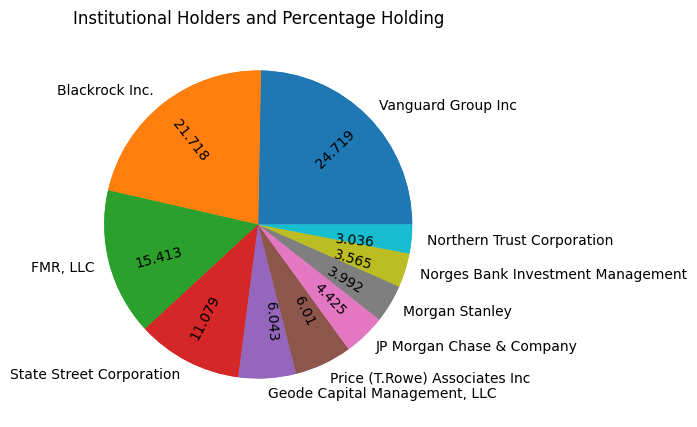

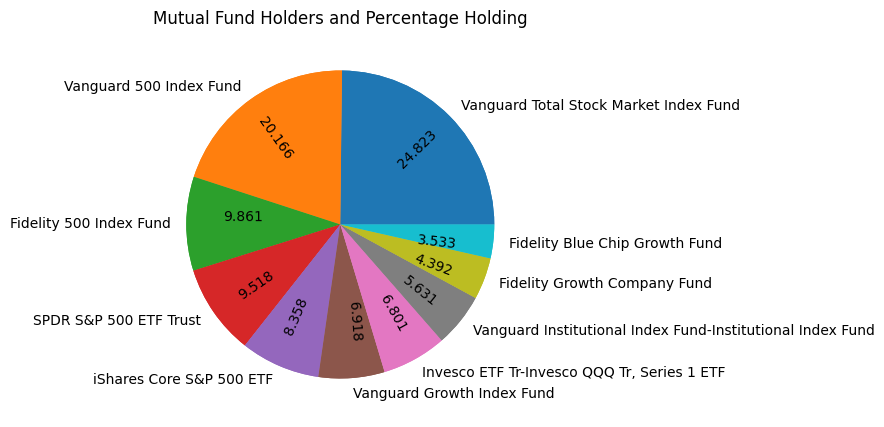

<Figure size 640x480 with 0 Axes>

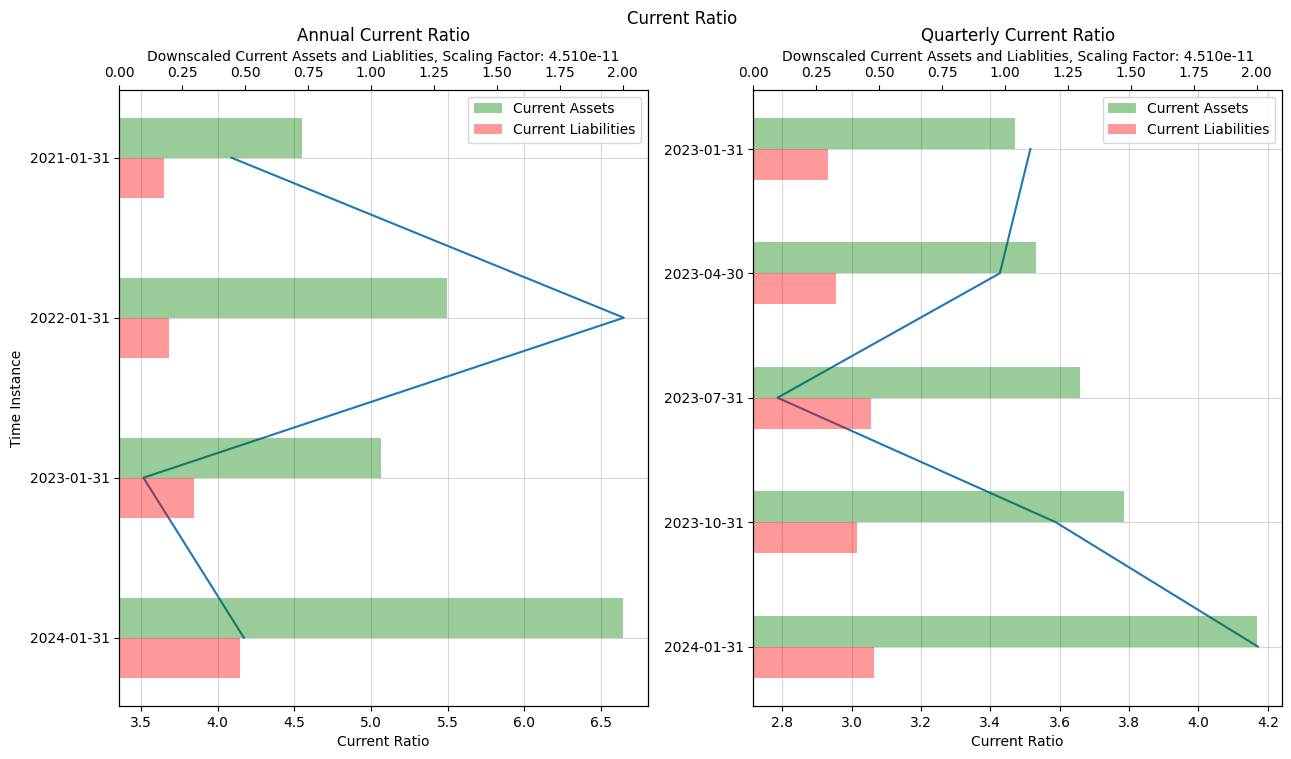

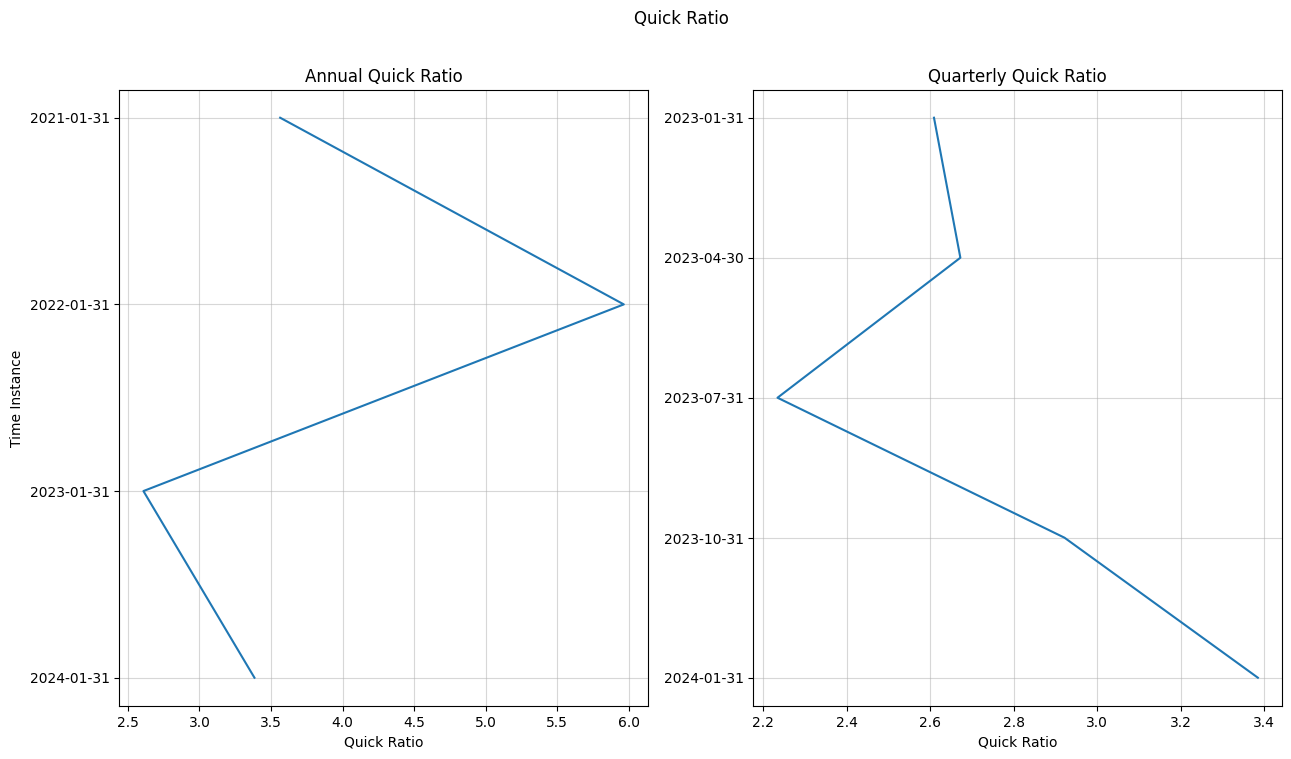

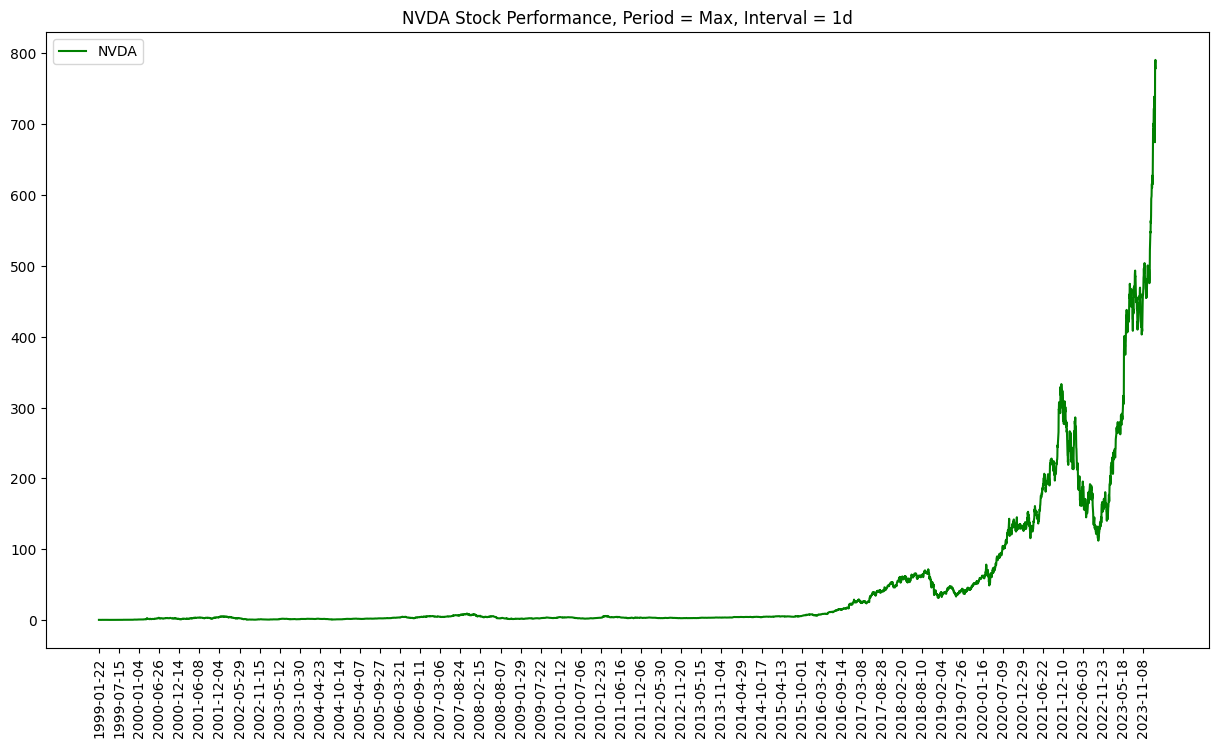

In [6]:
symbol = 'NVDA'
with open('Report.md','w') as file:
    file.write(getSymbolReport(symbol = symbol))
file.close()

## **NVIDIA Corporation**<br>
longName: NVIDIA Corporation<br>
website: https://www.nvidia.com<br>
sector: Technology<br>
industry: Semiconductors<br>

### **Business Summary**<br>
NVIDIA Corporation provides graphics, and compute and networking solutions in the United States, Taiwan, China, Hong Kong, and internationally. The Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infrastructure, and solutions for gaming platforms; Quadro/NVIDIA RTX GPUs for enterprise workstation graphics; virtual GPU or vGPU software for cloud-based visual and virtual computing; automotive platforms for infotainment systems; and Omniverse software for building and operating metaverse and 3D internet applications. The Compute & Networking segment comprises Data Center computing platforms and end-to-end networking platforms, including Quantum for InfiniBand and Spectrum for Ethernet; NVIDIA DRIVE automated-driving platform and automotive development agreements; Jetson robotics and other embedded platforms; NVIDIA AI Enterprise and other software; and DGX Cloud software and services. The company's products are used in gaming, professional visualization, data center, and automotive markets. It sells its products to original equipment manufacturers, original device manufacturers, system integrators and distributors, independent software vendors, cloud service providers, consumer internet companies, add-in board manufacturers, distributors, automotive manufacturers and tier-1 automotive suppliers, and other ecosystem participants. NVIDIA Corporation was incorporated in 1993 and is headquartered in Santa Clara, California.
### **Employee Details**<br>
fullTimeEmployees: 29600<br>
majorEmployees:<br>
- Mr. Jen-Hsun  Huang: Co-Founder, CEO, President & Director<br>
- Ms. Colette M. Kress: Executive VP & CFO<br>
- Ms. Debora  Shoquist: Executive Vice President of Operations<br>
- Mr. Timothy S. Teter: Executive VP, General Counsel & Secretary<br>
- Mr. Ajay K. Puri: Executive Vice President of Worldwide Field Operations<br>
- Mr. Chris A. Malachowsky: Co-Founder<br>
- Mr. Donald F. Robertson Jr.: VP & Chief Accounting Officer<br>
- Prof. William J. Dally: Chief Scientist & Senior VP of Research<br>
- Ms. Simona  Jankowski C.F.A., J.D.: Vice President of Investor Relations<br>
- Mr. Robert  Sherbin: Vice President of Corporate Communications<br>
### **Recent Company News**<br>
title: Better "Magnificent Seven" Buy: Nvidia or Tesla<br>
link: https://finance.yahoo.com/m/1bbe9d4a-48bc-3be9-a524-2ba599baf88f/better-%22magnificent-seven%22.html<br>
publisher: Motley Fool<br>
<br>
title: 'Fail quickly and inexpensively': Nvidia founder and CEO Jensen Huang shares his mantra for success � here's why Jim Cramer calls him a bigger visionary than Elon Musk<br>
link: https://finance.yahoo.com/news/fail-quickly-inexpensively-nvidia-founder-130300123.html<br>
publisher: Moneywise<br>
<br>
title: Could Nvidia Be a Threat to Super Micro Computer?<br>
link: https://finance.yahoo.com/m/ce9c926f-1b46-3b37-86c8-ddde9699f0a1/could-nvidia-be-a-threat-to.html<br>
publisher: Motley Fool<br>
<br>
title: Dow Jones Futures: Coinbase Rockets To New High; Unity Stock Plunges 19% On Earnings<br>
link: https://finance.yahoo.com/m/0048296b-4e30-33a4-b97c-23d370f2e3b4/dow-jones-futures%3A-coinbase.html<br>
publisher: Investor's Business Daily<br>
<br>
title: History Says Nvidia's Stock Will Fall for 1 Simple Reason<br>
link: https://finance.yahoo.com/m/bc18f63e-e36a-3f1b-ab2c-2b7d150f7ee5/history-says-nvidia%27s-stock.html<br>
publisher: Motley Fool<br>
<br>
title: Will Nvidia Be a $3 Trillion-Dollar Stock by 2025?<br>
link: https://finance.yahoo.com/m/390fd110-0943-3c10-a032-d96c2fab285f/will-nvidia-be-a-%243.html<br>
publisher: Motley Fool<br>
<br>
title: Nvidia Stock Has 12% Upside, According to 1 Wall Street Analyst<br>
link: https://finance.yahoo.com/m/7c24ddcf-bdb3-3f0b-9f51-0f8699744a7c/nvidia-stock-has-12%25-upside%2C.html<br>
publisher: Motley Fool<br>
<br>
title: Corporate AI Investment Is Surging, to Nvidia�s Benefit<br>
link: https://finance.yahoo.com/m/0842a888-1021-3227-adc0-89f68f0b8b73/corporate-ai-investment-is.html<br>
publisher: The Wall Street Journal<br>
<br>
### **Investor Data**<br>
![Institutional Holders and Percentage Holding](./ReportMedia/Institutional_Holders_and_Percentage_Holding.png)<br>
![Mutual_Fund_Holders_and_Percentage_Holding](./ReportMedia/Mutual_Fund_Holders_and_Percentage_Holding.png)<br>
### **Latest Financials**<br>
#### General Financials<br>
totalRevenue: 60921999360<br>
totalDebt: 11056000000<br>
totalCash: 25984000000<br>
enterpriseValue: 1955496984576<br>
bookValuePerShare: 17.442<br>
marketCap: 1977299894272<br>
#### Liquidity Ratios<br>
![Current Ratio](./ReportMedia/Current_Ratio.png)<br>
![Quick Ratio](./ReportMedia/Quick_Ratio.png)<br>
### Technical Information<br>
![Stock Chart](./ReportMedia/Stock_Chart.png)